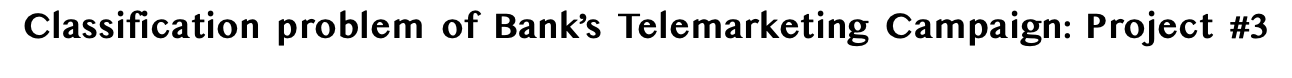

#### Importing libraries 

In [1]:
# Pandas and Matplotlib

import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

#Sk-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,classification_report
import warnings
import random
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import time
import seaborn as sns
import seaborn
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import re
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


*  `age ` - age of the costumer (numeric)

*  `job` type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

*  `marital ` marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* `education ` - (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

* `default` - has credit in default? (categorical: 'no','yes','unknown')

* `housing ` has housing loan? (categorical: 'no','yes','unknown')

* `loan` - has personal loan? (categorical: 'no','yes','unknown')


* `contact` - contact communication type (categorical: 'cellular','telephone')

* `month` -last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* `day_of_week ` -last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* `duration ` last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 

   target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after      the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and          should be discarded if the intention is to have a realistic predictive model.

* `campaign` -number of contacts performed during this campaign and for this client (numeric, includes last contact)

* `pdays: ` - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* `previous ` -number of contacts performed before this campaign and for this client (numeric)

* `poutcome ` - outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

* `emp.var.rate ` - employment variation rate - quarterly indicator (numeric)

* `cons.price.idx ` - consumer price index - monthly indicator (numeric)

* `cons.conf.idx ` - consumer confidence index - monthly indicator (numeric)

* `uribor3m ` -  euribor 3 month rate - daily indicator (numeric)

* `nr.employed `- number of employees - quarterly indicator (numeric)

*  `subscribed `- has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
# Upload the data and view it

df_bank = pd.read_excel(r'D:\OneDrive - NITT\Custom_Download\bank.xlsx')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Replace the name of the target variable from ‘y’ to ‘subscribed’ for clarity purposes. 

df_bank = df_bank.rename({'y': 'subscribed'}, axis=1)  # new method

In [4]:
# Check the overall data, data type, and number of entries. Spot null values. 

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Check the shape of the data 21 columns and 41,188 raws

df_bank.shape

(41188, 21)

In [6]:
# List all the columns 
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

### Checking for Null Values

In [7]:
# Using isnull method and sum it up
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [8]:
# Checking for object values

cat_df = df_bank.select_dtypes('object')
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [9]:
# Checking for the frequency of values of each column
for colname in cat_df.columns:
    try:
        print(colname, cat_df[colname].value_counts(normalize=True)[:10])
    except:
        print(colname, cat_df[colname].value_counts(normalize=True))

    print('\n')

job admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
Name: job, dtype: float64


marital married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


education university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64


default no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


housing yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64


loan no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: 

#### marital 

**unknown   0.001942

#### education 
**unknown               0.042027

#### default 
**unknown  0.208726

#### housing yes       

**unknown  0.024036

#### loan 

**unknown  0.024036



In [10]:
# The unkown values replaced with None and then dropped
unknown_col = ['job','marital', 'education', 'loan', 'housing']

for col in unknown_col: 
    df_bank[col] = df_bank[col].replace('unknown', None)
    #df_bank[col] = df_bank[col].fillna(df[col].mode())
    df_bank.dropna(axis=0, subset=[col], inplace = True)

#### Handling Duplicates

In [11]:
# Check for duplicates
df_bank.duplicated().sum()

12

In [12]:
# Remove dupicates
df_bank = df_bank.drop_duplicates()

In [13]:
# Doble check for duplicates

df_bank.duplicated().sum()

0

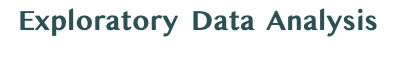

### Checking if the data is  balanced  

In [14]:
# Plot the target variables in order to examine whether the data is imbalanced. 

subscribe_vc = df_bank['subscribed'].value_counts()
subscribe_vc

no     36537
yes     4639
Name: subscribed, dtype: int64

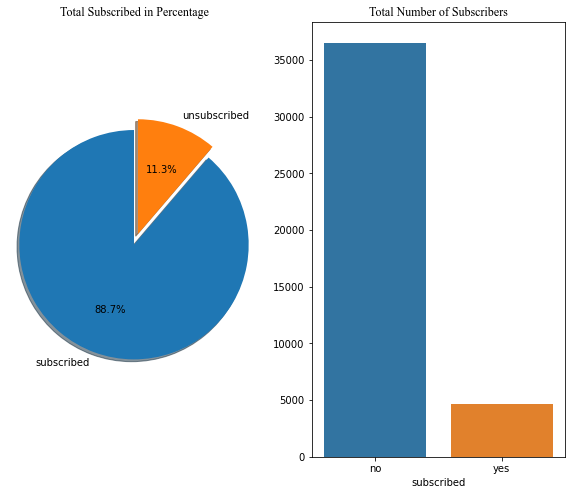

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

labels = 'subscribed', 'unsubscribed'
sizes = df_bank['subscribed'].value_counts() 
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig, ax = plt.subplots(1,2,figsize=(10,8))


ax[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Total Subscribed in Percentage', fontname='Times New Roman')


sns.countplot('subscribed', data=df_bank, ax=ax[1])

ax[1].set_title('Total Number of Subscribers', fontname='Times New Roman')
ax[1].set_ylabel('')

plt.show()



### The data is imbalanced -  only 11.3% costumes subscribed to the bank campaign. Later on, when we build the model, it will need to be dealt with. Most models can’t produce proper results when the data is imbalanced. 

In [16]:
# Check the distribution of data type


print("Data types and their frequency\n{}".format(df_bank.dtypes.value_counts()))

Data types and their frequency
object     11
int64       5
float64     5
dtype: int64


In [17]:
# Check balance of target data 

df_bank['subscribed'].value_counts()

no     36537
yes     4639
Name: subscribed, dtype: int64

In [18]:
# Check for unique values for all the columns

df_bank.nunique()

age                 78
job                 11
marital              3
education            7
default              3
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
subscribed           2
dtype: int64

### Exploring Continiuous Variables

In [19]:
# Checking the distribution for the categorical variables c 

df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Correlation

In [20]:
# Create a function that captures the numerical variables. 

numerical_var = [feature for feature in df_bank.columns if ((df_bank[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of continuous variables: ', len(numerical_var))

# visualise the numerical variables
df_bank_num = df_bank[numerical_var].head()


df_bank_num


Number of continuous variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


<function matplotlib.pyplot.show(close=None, block=None)>

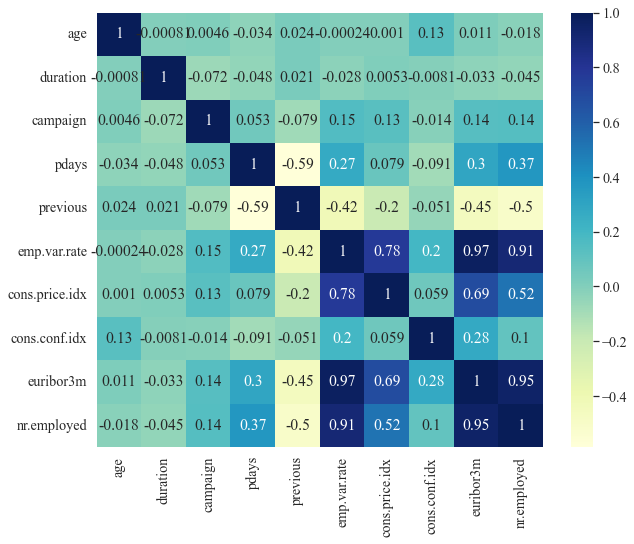

In [21]:
# Checking the correlation metrics.

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='Times New Roman', 
              font_scale= 1.3, color_codes=True, rc=None)

plt.figure(figsize=(10,8))

sns.heatmap(df_bank.corr(),cmap='YlGnBu',annot=True)



plt.show

In [22]:
# Select upper triangle of correlation matrix, removing corr. higher than 0.95

corr_matrix = df_bank.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Using a loop that would scan for high correlation 0.95 and 
# would remove the respective variable. 

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

to_drop


['euribor3m', 'nr.employed']

####  These are the variables suggested 'euribor3m', 'nr.employed'  - there are multiple strong relationships. ‘emp.var.rate’ and euribor3m as well as emp.car.rate with ‘nr.employed’.

#### I will remove ‘nr.employed’ and ‘emp.var.rate’ since ‘euribor3m’ is likely to be an important part of decision making for individuals when they decide to Subscribe or not to Subscribe.  


In [23]:
# Drop the respective features 

to_drop = ['nr.employed', 'emp.var.rate']

df_bank.drop(to_drop, axis=1, inplace=True)

In [24]:
# Scan the data again to verify that the variables were removed.
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


<function matplotlib.pyplot.show(close=None, block=None)>

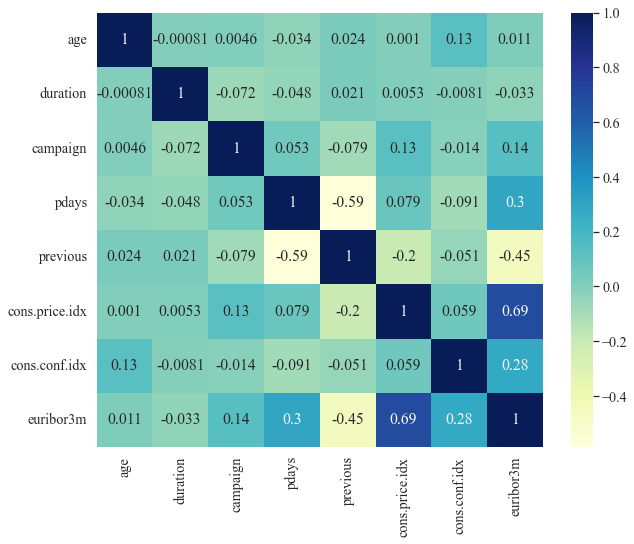

In [25]:
# Checking again the correlation metrics.


sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='Times New Roman', 
              font_scale= 1.3, color_codes=True, rc=None)

plt.figure(figsize=(10,8))

sns.heatmap(df_bank.corr(),cmap='YlGnBu',annot=True)


plt.show

### Pairplot

In [26]:
# I will plot pairplot - using the hue ‘subscribed’ in order to spot any patterns.

#plt.figure(figsize=(50,40))
#sns.pairplot(df_bank, hue='subscribed')
#ax.legend()

#### Notes from pairplot - most variables are categorical. The continuous variables show various types of distribution. 

### Histogram

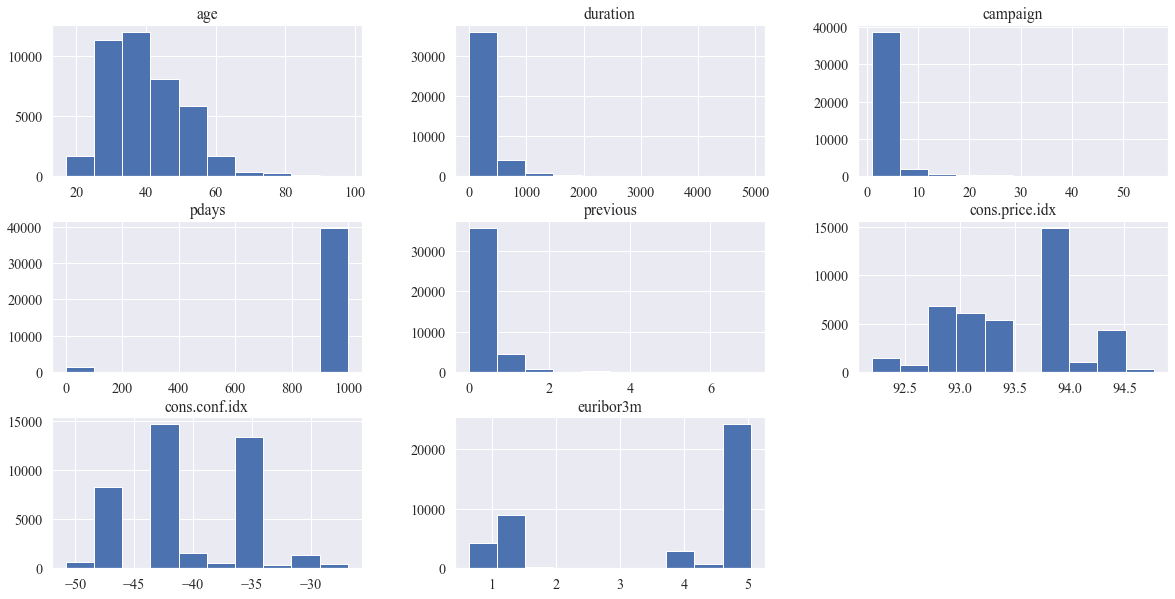

In [27]:
# Plot a histogram to take a closer look at the distribution. 

df_bank.hist(figsize= [20,10])
plt.show()

### Visualize Numerical Variables

In [28]:
# Here is another way to get the numerical data using _get_numeric _data function. 

numeric_data = df_bank._get_numeric_data()
numeric_data.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,0,93.994,-36.4,4.857
1,57,149,1,999,0,93.994,-36.4,4.857
2,37,226,1,999,0,93.994,-36.4,4.857
3,40,151,1,999,0,93.994,-36.4,4.857
4,56,307,1,999,0,93.994,-36.4,4.857


<Figure size 432x288 with 0 Axes>

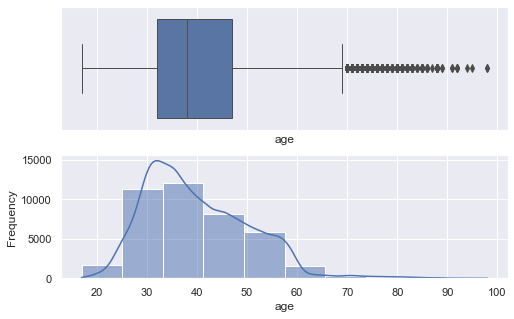

<Figure size 576x360 with 0 Axes>

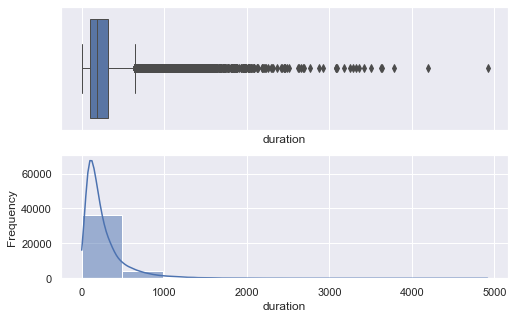

<Figure size 576x360 with 0 Axes>

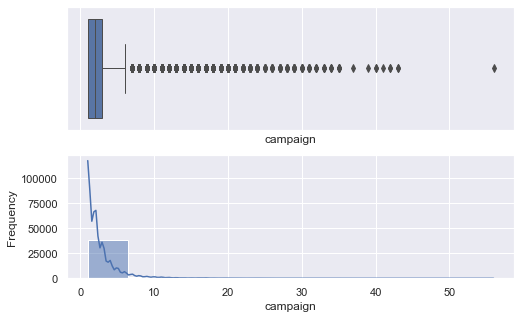

<Figure size 576x360 with 0 Axes>

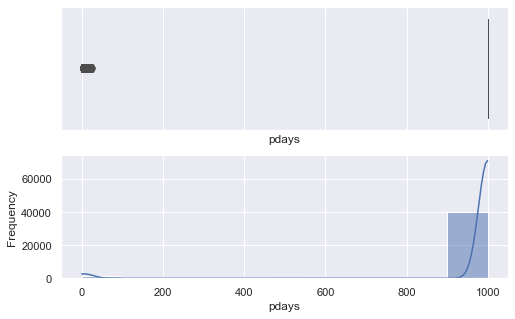

<Figure size 576x360 with 0 Axes>

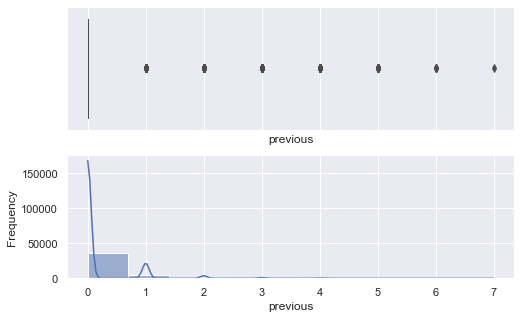

<Figure size 576x360 with 0 Axes>

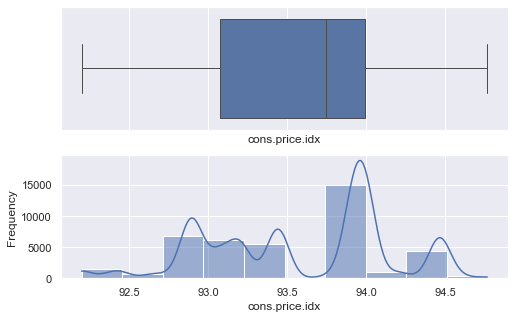

<Figure size 576x360 with 0 Axes>

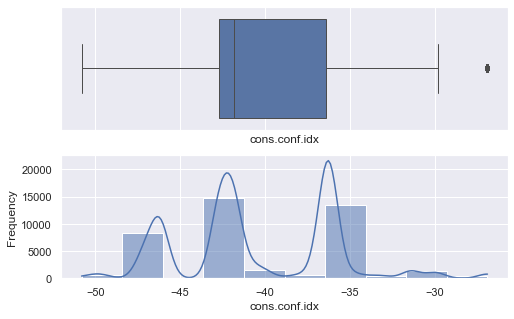

<Figure size 576x360 with 0 Axes>

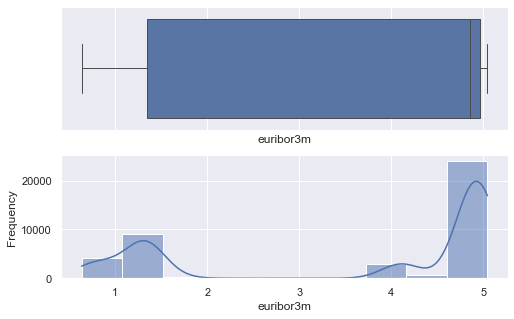

In [29]:
# In this plot, we dive a little closer into the distribution of the numerical columns.

for i in numeric_data.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numeric_data[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(numeric_data[i], ax=ax_hist , bins = 10,kde=True)

#### Age: most of the population was from 30 to 50 years old. 
#### Duration: most calls ranged from a minute to 8.5 minutes.

In [30]:
# Using a lambda function  - I replace all the dots with the underlying symbol. 


df_bank.columns = list(map(lambda x: x.replace('.', '_'),
                                 df_bank.columns))


Statistical Summary 


Subscribed
                 count        mean         std     min      25%    50%  \
age             4639.0   40.912266   13.838838  17.000   31.000   37.0   
duration        4639.0  553.256090  401.190736  37.000  253.500  449.0   
pdays           4639.0  791.990946  403.439220   0.000  999.000  999.0   
previous        4639.0    0.492779    0.860406   0.000    0.000    0.0   
cons_price_idx  4639.0   93.354577    0.676592  92.201   92.893   93.2   
cons_conf_idx   4639.0  -39.791119    6.139657 -50.800  -46.200  -40.4   

                    75%       max  
age              50.000    98.000  
duration        741.500  4199.000  
pdays           999.000   999.000  
previous          1.000     6.000  
cons_price_idx   93.918    94.767  
cons_conf_idx   -36.100   -26.900  


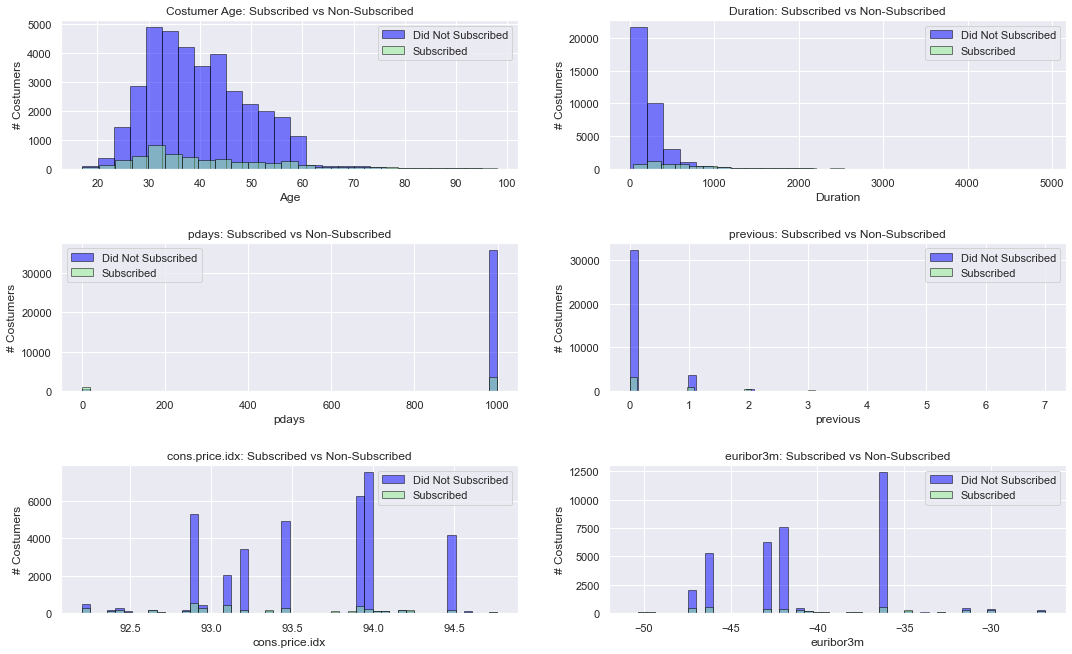

In [31]:
# Plotting the numerical variables in relationship to subscribers versus 
# people who did not subscribe.
print('Statistical Summary ')
print('\n')
print('Subscribed')
print(df_bank[df_bank['subscribed']=='yes'][['age','duration','pdays','previous',
                                             'cons_price_idx',
                                             'cons_conf_idx']].describe().transpose())
# print('--'*40)
# print('')

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (18,15))
fig.subplots_adjust(hspace = .50)


ax1 = fig.add_subplot(421)
ax1.hist(df_bank[df_bank['subscribed']=='no'].age, bins = 25, 
         label ='Did Not Subscribed', alpha = .50,edgecolor= 'black',color ='blue')
ax1.hist(df_bank[df_bank['subscribed']=='yes'].age, bins = 25, 
         label = 'Subscribed', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Costumer Age: Subscribed vs Non-Subscribed')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Costumers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(422)
ax2.hist(df_bank[df_bank['subscribed']=='no'].duration,
         bins = 25, label = 'Did Not Subscribed', alpha = .50, 
         edgecolor ='black', color = 'blue')
ax2.hist(df_bank[df_bank['subscribed']=='yes'].duration,
         bins = 25, label = 'Subscribed', alpha = .50, 
         edgecolor = 'black',color ='lightgreen')
ax2.set_title('Duration: Subscribed vs Non-Subscribed')
ax2.set_xlabel('Duration')
ax2.set_ylabel('# Costumers')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(423)


ax3.hist(df_bank[df_bank['subscribed']=='no'].pdays, bins = 50,
         label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax3.hist(df_bank[df_bank['subscribed']=='yes'].pdays, bins = 50, 
         label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax3.set_title('pdays: Subscribed vs Non-Subscribed')
ax3.set_xlabel('pdays')
ax3.set_ylabel('# Costumers')
ax3.legend(loc = 'upper right')


ax4 = fig.add_subplot(424)


ax4.hist(df_bank[df_bank['subscribed']=='no'].previous, 
         bins = 50, label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', 
         color = 'blue')
ax4.hist(df_bank[df_bank['subscribed']=='yes'].previous, 
         bins = 50, label = 'Subscribed', alpha = .50, edgecolor = 'black',
         color ='lightgreen')
ax4.set_title('previous: Subscribed vs Non-Subscribed')
ax4.set_xlabel('previous')
ax4.set_ylabel('# Costumers')
ax4.legend(loc = 'upper right')



ax5 = fig.add_subplot(425)

ax5.hist(df_bank[df_bank['subscribed']=='no'].cons_price_idx,
         bins = 50, label = 'Did Not Subscribed', alpha = .50, 
         edgecolor ='black', color = 'blue')
ax5.hist(df_bank[df_bank['subscribed']=='yes'].cons_price_idx,
         bins = 50, label = 'Subscribed', alpha = .50, edgecolor = 'black',
         color ='lightgreen')
ax5.set_title('cons.price.idx: Subscribed vs Non-Subscribed')
ax5.set_xlabel('cons.price.idx')
ax5.set_ylabel('# Costumers')
ax5.legend(loc = 'upper right')



ax6 = fig.add_subplot(426)


ax6.hist(df_bank[df_bank['subscribed']=='no'].cons_conf_idx, bins = 50, 
         label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax6.hist(df_bank[df_bank['subscribed']=='yes'].cons_conf_idx, bins = 50, 
         label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax6.set_title('euribor3m: Subscribed vs Non-Subscribed')
ax6.set_xlabel('euribor3m')
ax6.set_ylabel('# Costumers')
ax6.legend(loc = 'upper right')

ax3.legend()

plt.show()

#### Certain elements are evident -  

#### * A prospective client is more likely to subscribe without having any previous contacts. 

#### * People in their 30s are more likely to subscribe.

####  * Certain indices are showing a small increase in likelihood. 



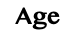

In [32]:
# Plotting specific ages to see which ones subscribed the most.  

def myplot(colname):

    df_plot = df_bank.groupby(['subscribed', 
                               colname]).size().reset_index().pivot(columns='subscribed', 
                                                                    index=colname, values=0)
    df_plot['total'] = df_plot.sum(axis=1)
#     df_plot['no'] = df_plot['no']*100/df_plot['total']
#     df_plot['yes'] = df_plot['yes']*100/df_plot['total']
    df_plot.drop('total',axis=1,inplace=True)
#     df_plot.sort_values('yes',ascending=False,inplace=True)

#     fig.set_size_inches(20, 8)


    df_plot.plot(kind='bar', stacked=True, figsize=(30,12))


    plt.xlabel(colname, fontsize=32)
    plt.ylabel('Count', fontsize=32)
    plt.xticks(rotation = 90,fontsize=26)
    plt.yticks(rotation = 0,fontsize=24)
    plt.grid(True, color = "white", linewidth = "1.4", linestyle = "-")
    plt.legend(loc=2, prop={'size': 22})

    #ax.set_title('Age Count Distribution', fontsize=28)

    sns.despine()

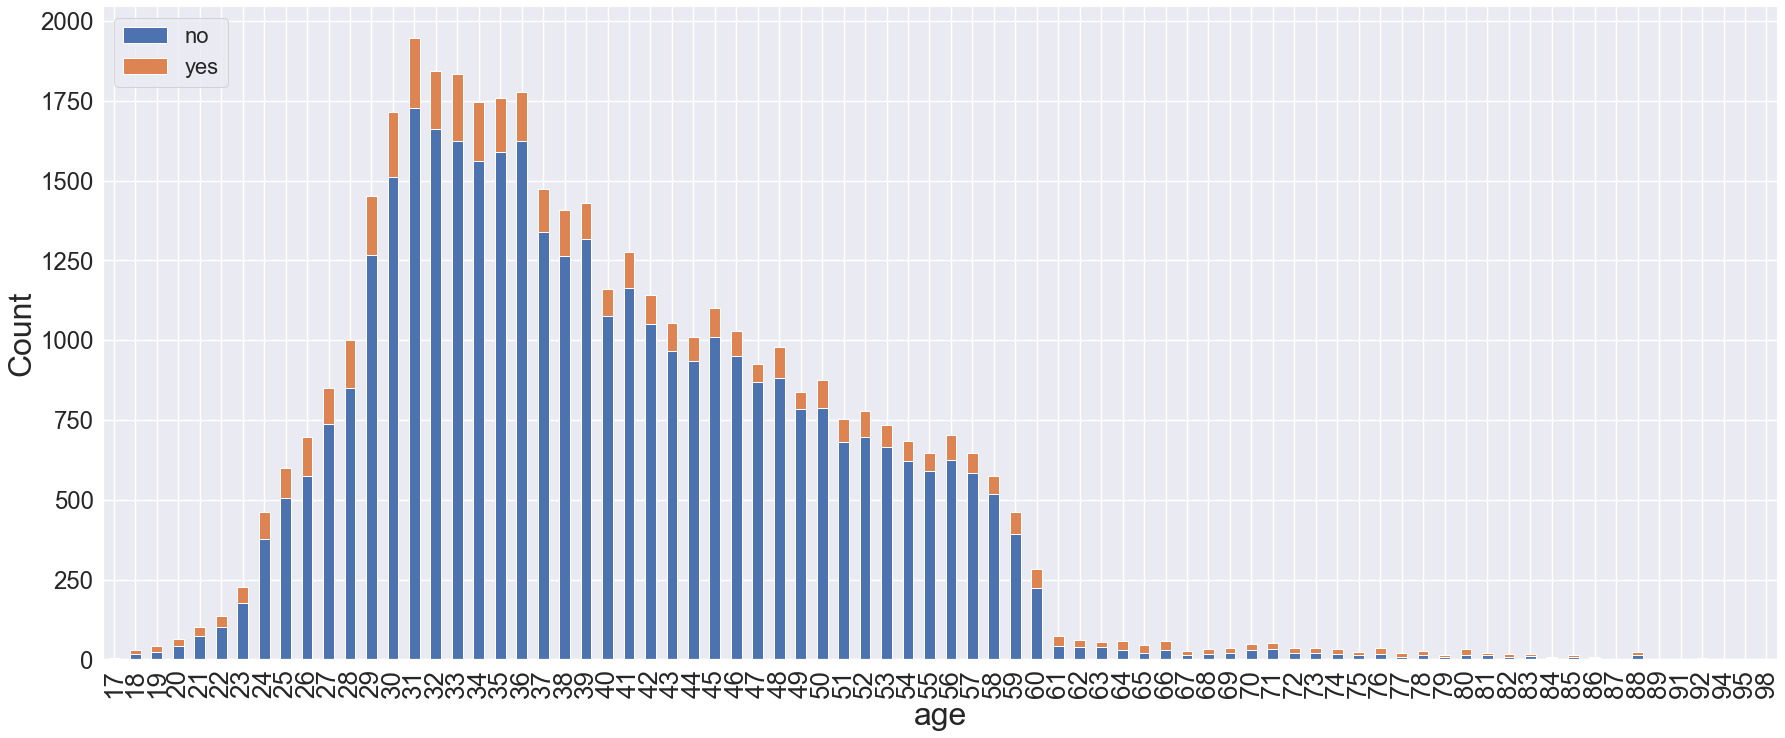

In [33]:
myplot('age')

#### I decided to create ranges of ages since it will give a better sense of what group to target. 

In [34]:
# Here are the  bins  based on the values observed above. 
# 5 values will result in 4 bins

bins = [17, 35, 36, 55, 56, 65, 66, 98]


#We'll pd.cut method to separate data into bins.
df_bank['bins_age'] = pd.cut(df_bank['age'], bins)

# I will use .cat.as_unordered() method transforming the data to 
# ordered categories.
# bins_age_built = bins_yr_built.cat.as_unordered()
# bins_yr_built.head()

In [35]:
# Rechaeck data set for bins column.

df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,subscribed,bins_age
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no,"(55, 56]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no,"(56, 65]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no,"(36, 55]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no,"(36, 55]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no,"(55, 56]"


In [36]:
# Assigning a name for a demographic age group for each bin.

df_bank = df_bank.assign(age_group=pd.cut(df_bank['age'], bins=[17, 35,  55,  65, 98], 
                             right=False, labels = ['Young_Adults','Middle_Aged Adults', 
                                            'Older_Adults','Seniors']))

In [37]:
# Make an independent copy so I won't need to run the notebook from the top. 
df_bank_copy = df_bank.copy()

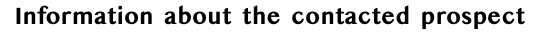

In [38]:
# Building a “countplot” function that will plot the distribution for each categorical variable. 

def countplot(colname):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    sns.countplot(x = colname, data = df_bank, order = df_bank[colname].value_counts().index,
                  palette = "coolwarm_r")
    ax.set_xlabel(colname, fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    plt.xticks(rotation = 50,fontsize=16)
    plt.yticks(rotation = 0,fontsize=16)
    ax.set_title('Distribution', fontsize=16)
    ax.tick_params(labelsize=14)
    sns.despine()

In [39]:
df_bank["age_group"].value_counts()

Middle_Aged Adults    22197
Young_Adults          14751
Older_Adults           3566
Seniors                 660
Name: age_group, dtype: int64

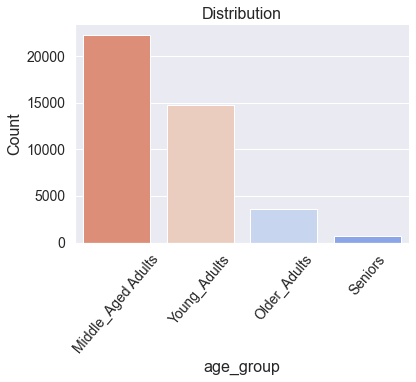

In [40]:
countplot('age_group')

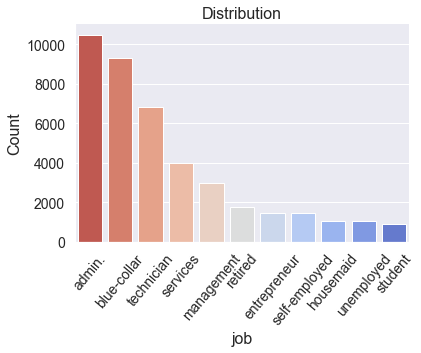

In [41]:
countplot('job')

#### The sample of the population that was mainly included in the job category was:  Admin, Blue-color Technician.

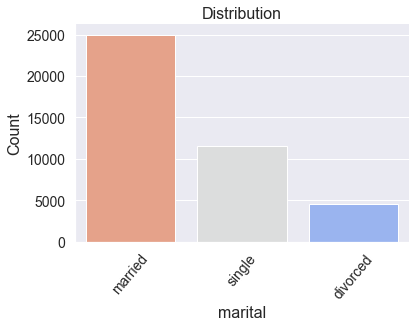

In [42]:
countplot('marital')

#### In terms of marital status, there were twice as many married people as single and one-fourth divorced.

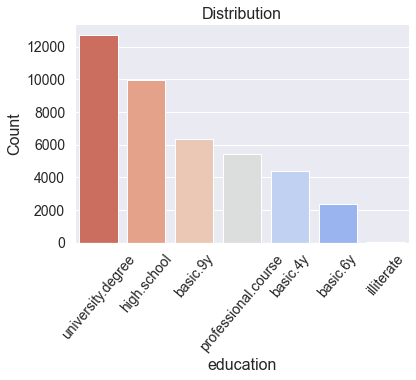

In [43]:
countplot('education')

#### There were twice as many individuals with a university degree who were contacted than individuals who had 9 years of schooling.

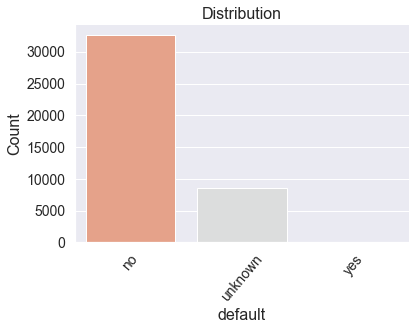

In [44]:
countplot('default')

#### Most individuals who were contacted did not default on their credit. 

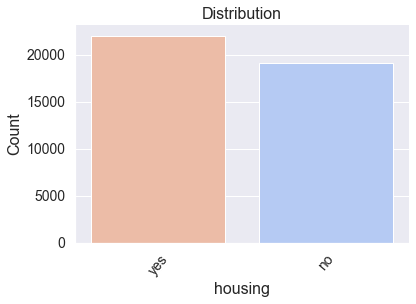

In [45]:
countplot('housing')

#### Individuals with or without housing loans were contacted in a similar population size. 

In [46]:
df_bank['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

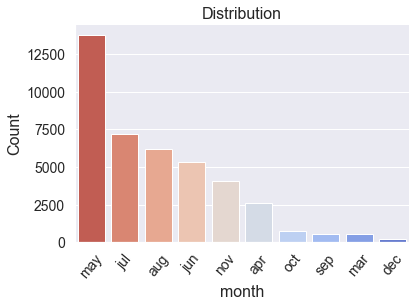

In [47]:
countplot('month')

#### While May has been the month where most of the calls were made (twice as much as Jan, Aug, and June) the days of the week were evenly distributed.

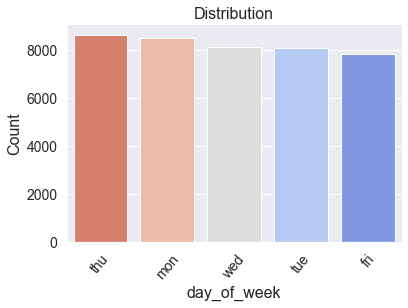

In [48]:
countplot('day_of_week')

#### Individuals were contacted during the week, (roughly equaliy distributed Mon. to Fri.)

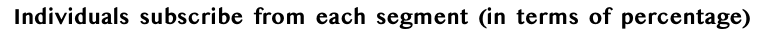

In [49]:
# Building a function that first extracts a data set with a given column and 
# a subscribed column.

def statPlot(colname):
    
    ############# crarte df ################
    df = df_bank[[colname,'subscribed']]

    df  = df.groupby([colname, 
                              'subscribed']).size().reset_index().pivot(columns='subscribed', 
                                                                        index=colname, 
                                                                    values=0)


    df['percentage_of_subscribers']= df['yes']*100/(df['no']+ df['yes'])
    # df_job['percentage_of_unsubscribers']= df_job['no']/(df_job['no']+ df_job['yes'])
    df.dropna(inplace=True)
    df= df.sort_values('percentage_of_subscribers').reset_index()
    df[colname] = df[colname].astype('str')
    
    ##### PLOT ####################
    plt.figure(figsize=(15,5))
    ax = sns.barplot(df[colname],df['percentage_of_subscribers'],
                     palette="vlag")
    for bars in ax.containers:
        ax.bar_label(bars, fmt="%.2f%%")
    plt.xticks(rotation = 50)
    plt.show()

In [50]:
# list all the columns 
list(df_bank)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'subscribed',
 'bins_age',
 'age_group']

In [51]:
# Creating a list so it would be easy to grab to run it in the function’s loop.   


imp_col= ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
'age_group']

In [52]:
df_bank[['job', 'subscribed']].value_counts()

job            subscribed
admin.         no            9138
blue-collar    no            8670
technician     no            6065
services       no            3674
management     no            2618
admin.         yes           1361
entrepreneur   no            1342
retired        no            1306
self-employed  no            1283
housemaid      no             959
unemployed     no             877
technician     yes            737
blue-collar    yes            642
student        no             605
retired        yes            438
management     yes            334
services       yes            324
student        yes            277
self-employed  yes            149
unemployed     yes            145
entrepreneur   yes            124
housemaid      yes            108
dtype: int64

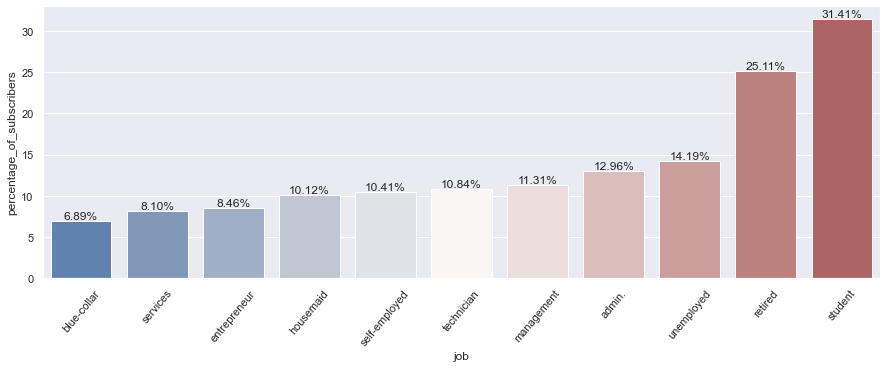

In [53]:
# Running functionfor the 'job' column

statPlot('job')

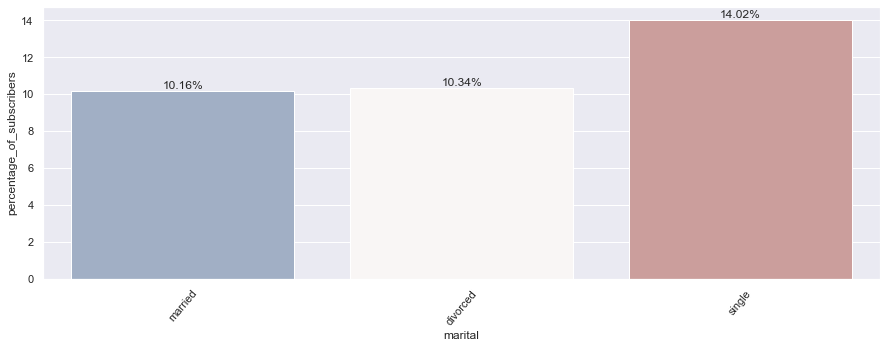

In [54]:
# Running functionfor the 'marital' column

statPlot('marital')

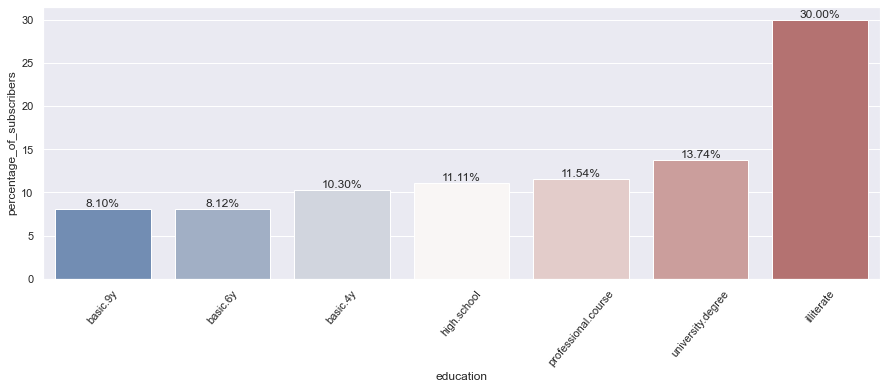

In [55]:
# Running functionfor the 'education' column

statPlot('education')

In [56]:
# String to be searched in start of string
# https://www.geeksforgeeks.org/python-pandas-series-str-count/

search ="illiterate"
 
# count of occurrence of a and creating new column
df_bank["count"]= df_bank["education"].str.count(search, re.I)
 
# display
df_bank["count"].value_counts()

0    41156
1       20
Name: count, dtype: int64

In [57]:
print("of Illiterate:")
#20/41156 = 0.00048
20 *.3

of Illiterate:


6.0

In [58]:
df_bank['education']

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41176, dtype: object

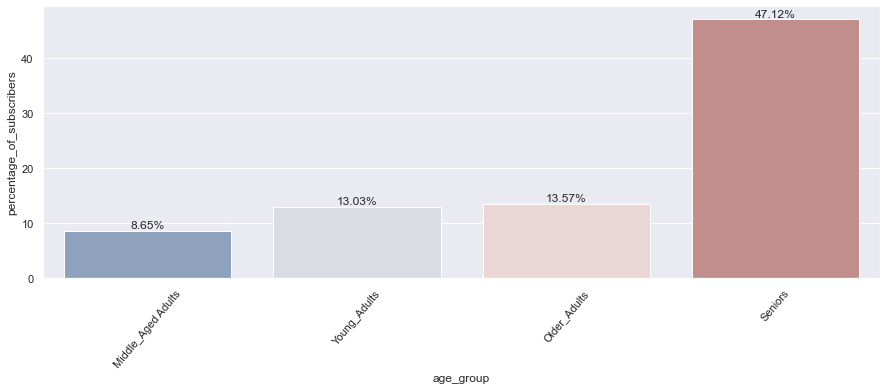

In [59]:
# Running function for the 'age_group' column 

statPlot('age_group')

In [60]:
df_bank[['age_group', 'subscribed']].value_counts()

age_group           subscribed
Middle_Aged Adults  no            20277
Young_Adults        no            12829
Older_Adults        no             3082
Young_Adults        yes            1922
Middle_Aged Adults  yes            1920
Older_Adults        yes             484
Seniors             no              349
                    yes             311
dtype: int64

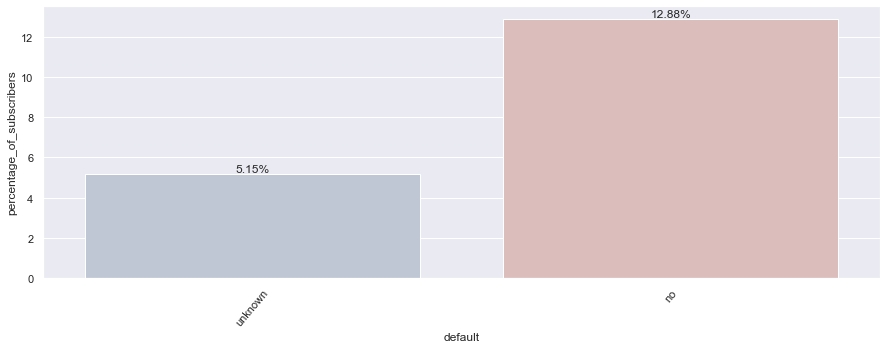

In [61]:
# Running function for the 'default' column 

statPlot('default')

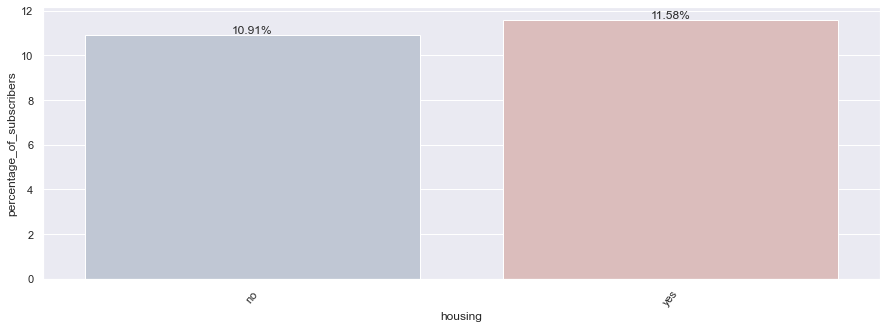

In [62]:
statPlot('housing')

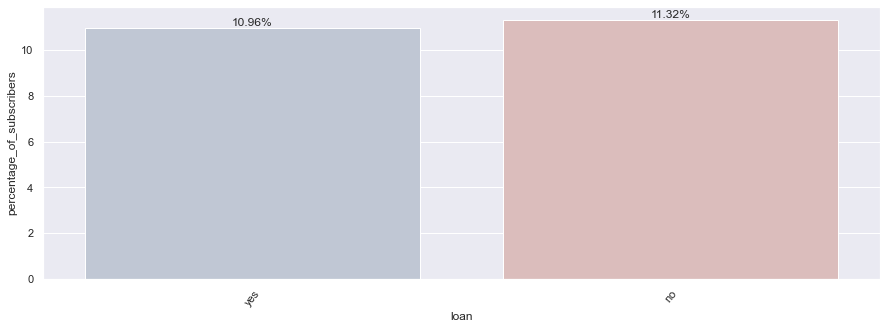

In [63]:
# Running function for the 'loan' column 
statPlot('loan')

In [64]:
df_bank[['contact','subscribed']].value_counts()

contact    subscribed
cellular   no            22283
telephone  no            14254
cellular   yes            3852
telephone  yes             787
dtype: int64

In [65]:
df_bank['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

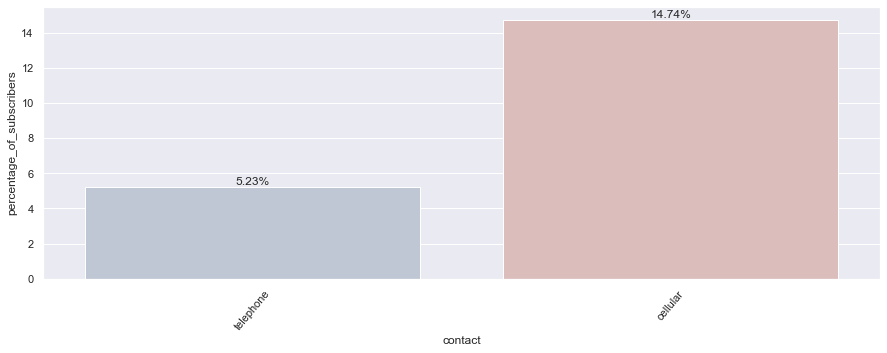

In [66]:
# Running function for the 'contact' column 
statPlot('contact')

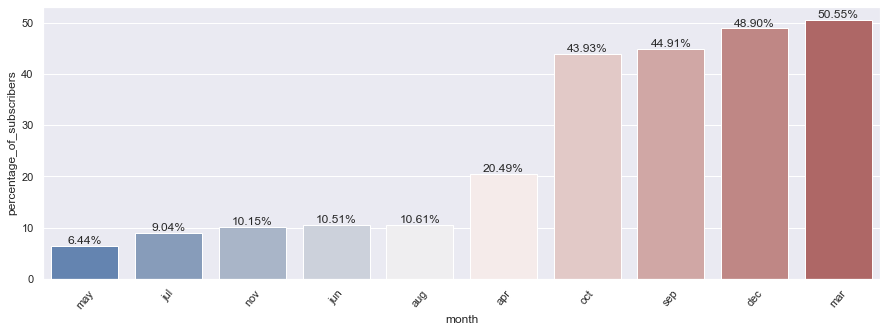

In [67]:
# Running function for the 'month' column 

statPlot('month')

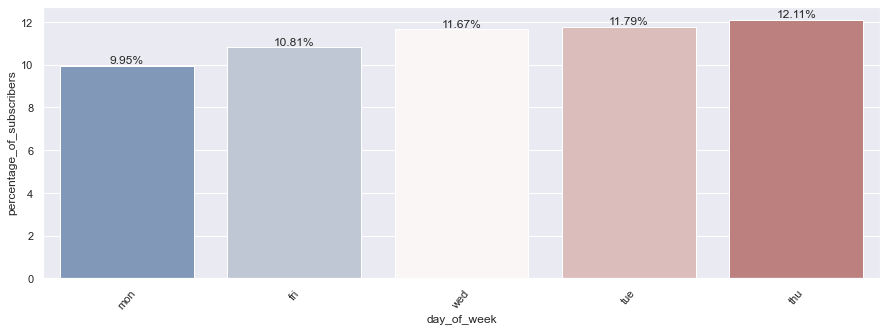

In [68]:
# Running function for the 'day_of_week' column 

statPlot('day_of_week')

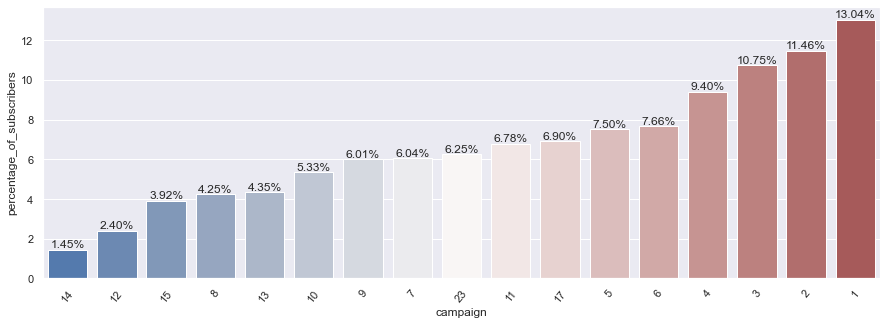

In [69]:
# Running function for the 'campaign' column 

statPlot('campaign')

#### Notes on the graphs:

* Job: Top three subscribers were: Students 31.43%, Retired Individuals: 25.23% and unemployed 14.2%. Students were twice as likely to subscribe than unemployed individuals. 

* Marital Status: Didn’t play a major role. There was not a significant difference among the individuals who were single, married, or divorced.  

* Education: There are six illiterate people included in this analysis. Therefore, there is not enough data to make any conclusion for that category. 

* The highest percentage was by individuals  those holding a university degree of 13.72%, and people who have taken professional courses 11.35%.

* Default:  People who did not default on their loans were 12% more likely to subscribe than the individuals who did default on their loan. 

* Loan: Having a loan did not make a major difference.

* Contact: Contacting individuals through a cellular phone was twice as likely to lead to a subscription. 

* Month: October, September, December, and March were the most successful months of the year. Prospects are three times more likely to subscribe to the bank campaign of term deposits. 

* Day of the week: There was no major difference among the days of the week in terms of the likelihood of subscribing. 

* Campaign: the highest percentage of subscribers came from individuals who were contacted 1-4 times.



#### Adding bins for the ‘campaign’ column - for the presentation

In [70]:
df_bank["campaign"].describe()

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [71]:
#Here are the  bins  based on the values observed above. 
# 5 values will result in 4 bins

bins = [1, 6, 10, 20, 50]

#We'll pd.cut method to separate data into bins.
df_bank['bins_camp'] = pd.cut(df_bank['campaign'], bins)

# I will use .cat.as_unordered() method transforming the data to 
# ordered categories.
# bins_age_built = bins_yr_built.cat.as_unordered()
# bins_yr_built.head()


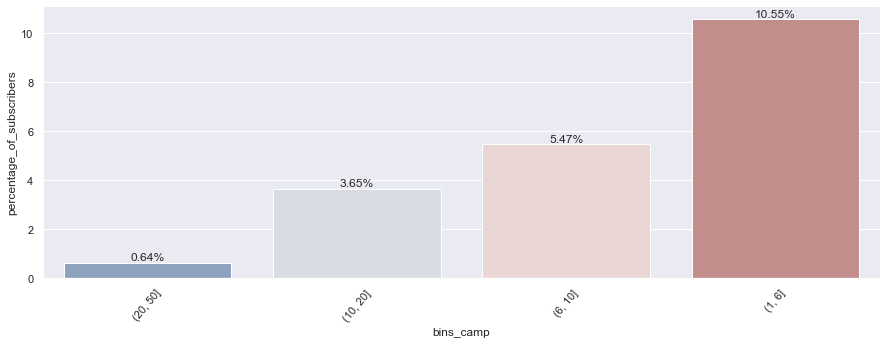

In [72]:
statPlot('bins_camp')

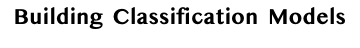

#### I will drop off the ‘duration’ column since the time of the call will not be known before contacting the prospect, and therefore including it in the model would create an unrealistic prediction. The variables included need to be known prior to the campaign call to assist businesses in targeting certain segments of the population. 

In [73]:
 
df_bank.drop(['duration','bins_age','bins_camp'],axis=1,inplace=True)

In [74]:
# Changing ‘Yes’ to ‘1’ and ‘No’ to ‘0’ in order to have numerical values for
# our target variable.
dic_sub = {'yes':1,'no':0}

df_bank['subscribed'] = df_bank['subscribed'].map(dic_sub)

df_bank['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: subscribed, Length: 41176, dtype: int64

In [75]:
# Splitting my data frame into X( independent variables) and y (dependent/target variable).

X = df_bank.drop("subscribed", axis=1)
y = df_bank["subscribed"]

In [76]:
# Look into object data 

X.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [77]:
#  converting the data type into sting 

df_bank['age_group'] = df_bank['age_group'].astype('str')

In [78]:
# Double checking for Null values.
X.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
age_group         2
count             0
dtype: int64

In [79]:
# Drop Null values from the 'age_group' column

df_bank = df_bank.dropna(axis=0, subset=['age_group'])

In [80]:
# Double check that there are no Null values

df_bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
subscribed        0
age_group         0
count             0
dtype: int64

### Score Function

#### We built a function that captures the classified models, trains them, and produces the scoring results (Accuracy, Precious Recall, and F1_Score). We added an “if statement” with a  display element to have the option to not display when unnecessary.


In [81]:
# Building a function that will fit the model and then fit it to produce predicted values. 

def Train_Test_Scores(model,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    # Store the score for later evaluation of the model. 
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    # Allowing the display to switch off for later on when I just need to function to run 
    # for other purposes like creating a data frame of the scoring. 
    
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
          
          
    return train_acc,test_acc,precision,recall,f1

Note on Scaling:

We are scaling the data using the Standard Scaler method. Standardize the data by making the mean of the distribution zero and the majority of the data will be between -1 and 1.

In [82]:
# Splitting the data into X and y - y is the target variable.


X = df_bank.drop("subscribed", axis=1)
y = df_bank["subscribed"]

# Extracting the index in order to know which ones are the categorical variables.   
# Testing if it equals to ‘0’ - object. 
cat_indx = [indx for indx,tp in enumerate(X.dtypes) if tp=='O']

# Creating a separate list for numerical and categorical variables. 

cat_col = list(X.select_dtypes('object'))
num_col = list(set(X) - set(cat_col))



#### SMOTE

#### Given that our data is unbalanced, where only 11% of the individuals subscribed and not even equality represented with the group that unsubscribed,  it can lead to inaccurate results when we employ a predictive model. In such scenarios of class imbalance, it is recommended to use  Synthetic Minority Over - Sampling Technique. We implemented   SMOTE- Nominal and Continuous (‘SMOTE-NC’) since our data contains categorical and numerical data.


In [83]:
# Applying Smote

from imblearn.over_sampling import SMOTENC #importing SMOTENC

smt = SMOTENC(categorical_features=cat_indx, random_state=2)
X_smote, y_smote = smt.fit_resample(X, y)

In [84]:
y_smote.value_counts()

0    36537
1    36537
Name: subscribed, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

### Pipeline

#### We inserted the pipeline as part of a function so that it can loop around when we employed the various classified models. 

In [86]:
# Pipeline function 

def custom_pipeline(clf,display=False):

    num_attribs = num_col # Continuous columns 
    cat_attribs = cat_col # Categorical columns 

    # When the data passed through the pipeline, 
    # it went through the first step of StandardSclare() and OneHotEncoder().
    preprocessor = ColumnTransformer([
            ("num", StandardScaler(), num_attribs),
            ("cat", OneHotEncoder(), cat_attribs),
        ])

    model = Pipeline(steps=[("preprocessor", preprocessor), ('model', clf)])
    model.fit(X_train,y_train)
    
    # The adjusted data fit the model/classifier and ultimately produced 
    # predictive values for the testing and training data and reverted back to 
    # the model scoring.
    
    ###############################################################

    y_pred = model.predict(X_test)
    X_probs = model.predict_proba(X_test)
    train_acc,test_acc,precision,recall,f1 = Train_Test_Scores(model,display)
   
    print("")
    return train_acc,test_acc,precision,recall,f1,y_pred,X_probs[:,1],model


### Logistic Regression Model

Training_Accuracy: 0.7666227612514754
Test_Accuracy: 0.7664043790626069
Precision: 0.7829343515934792
Recall: 0.7335902022842988
F1_Score: 0.7574595055413469



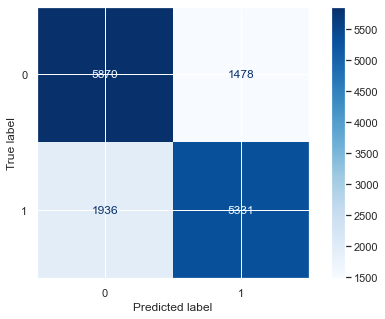

In [87]:
# Running logistic regression
lr = custom_pipeline(LogisticRegression(),display=True)

In [88]:
# print(classification_report(y_test,val[-1]))

### Decision Tree Model

Training_Accuracy: 0.9956037564788998
Test_Accuracy: 0.8903865891207663
Precision: 0.8824085324692859
Recall: 0.8994082840236687
F1_Score: 0.8908273136159194



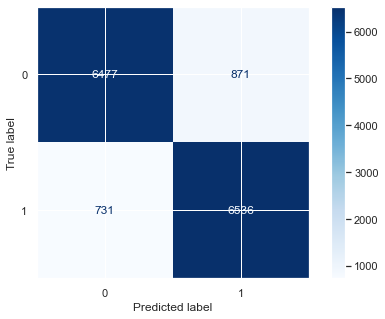

In [89]:
# Running Decision Tree 
dt = custom_pipeline(DecisionTreeClassifier(), display= True)

### XG Boost Model

Training_Accuracy: 0.9215347508510238
Test_Accuracy: 0.9068080738966815
Precision: 0.9273411492256477
Recall: 0.8816568047337278
F1_Score: 0.9039221218961625



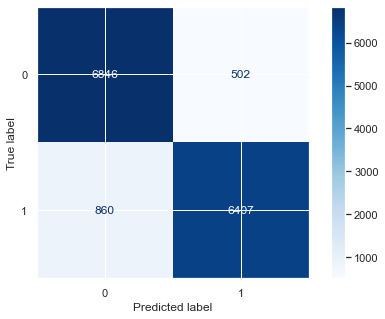

In [90]:
# Running XG Boost  
xgboost = custom_pipeline(XGBClassifier(n_jobs=-1),display= True)

### Random Forest Model

Training_Accuracy: 0.9956037564788998
Test_Accuracy: 0.9189873417721519
Precision: 0.9201547175024175
Recall: 0.9166093298472547
F1_Score: 0.9183786019578106



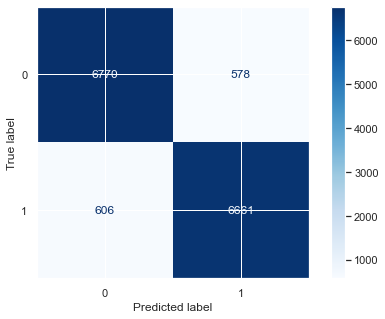

In [91]:
# Running Random Forest
rf = custom_pipeline(RandomForestClassifier(),display= True)

In [92]:
rf

(0.9956037564788998,
 0.9189873417721519,
 0.9201547175024175,
 0.9166093298472547,
 0.9183786019578106,
 array([0, 0, 1, ..., 0, 1, 0], dtype=int64),
 array([0.08 , 0.35 , 0.99 , ..., 0.085, 0.745, 0.02 ]),
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['age', 'campaign',
                                                    'euribor3m', 'cons_conf_idx',
                                                    'previous', 'pdays', 'count',
                                                    'cons_price_idx']),
                                                  ('cat', OneHotEncoder(),
                                                   ['job', 'marital',
                                                    'education', 'default',
                                                    'housing', 'loan', 'contact',
                                                    'month', 'day_of_wee

In [93]:
# pipe_models[-2] 

# function-pipeline

### Evaluating Models


In [94]:
# Creating a data frame to collect all the results and evaluate them

models_DataFrame = pd.DataFrame(columns=['Model','Train_Accuracy','Test_Accuracy',
                                         'Precision','Recall','F1_score'])
list_models = [LogisticRegression(),DecisionTreeClassifier(),
              RandomForestClassifier(n_jobs=-1),XGBClassifier(n_jobs=-1)]

model_names = 'Lositic_Regression  Decision_Tree Random_Forest XGboost'.split()

from tqdm import tqdm
x_probs  = []
pipe_models = []

for model,model_name in tqdm(zip(list_models,model_names)):
    train_acc,test_acc,precision,recall,f1,_,x_prob,pipe_model = custom_pipeline(model)  
    x_probs.append(x_prob)
    pipe_models.append(pipe_model)
    models_DataFrame.loc[len(models_DataFrame)] = [model_name,train_acc,test_acc,precision,recall,f1]
    

    

1it [00:03,  3.16s/it]

2it [00:05,  2.75s/it]

3it [00:12,  4.73s/it]

4it [00:22,  5.64s/it]

In [95]:
# Diplay data frame
models_DataFrame

,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_score
0,Lositic_Regression,0.766623,0.766404,0.782934,0.733590,0.757460
1,Decision_Tree,0.995604,0.889429,0.880436,0.899821,0.890023
2,Random_Forest,0.995604,0.917893,0.919862,0.914545,0.917196
3,XGboost,0.921535,0.906808,0.927341,0.881657,0.903922


In [96]:
# Checking which one was the top performer
models_DataFrame.sort_values('Test_Accuracy',ascending=False).values[0][0]

'Random_Forest'

In [97]:
# Preparing for plotting x and y axis
x_plot = models_DataFrame["Model"]
y_plot = models_DataFrame["Test_Accuracy"]

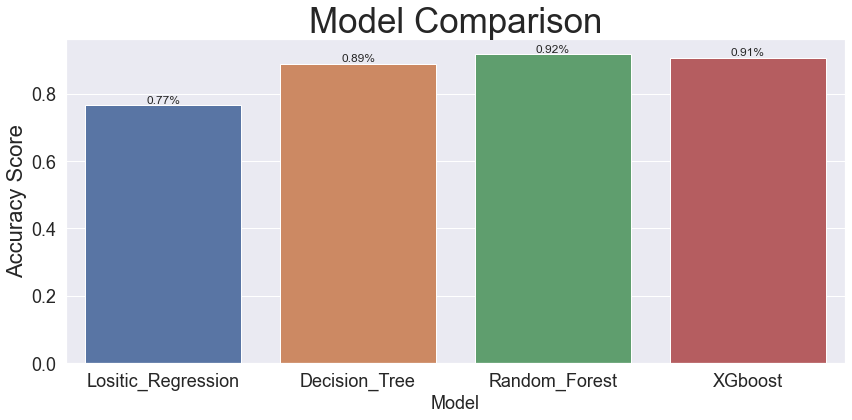

In [98]:
# Plotting model results

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=x_plot, y=y_plot)

# Lable and define fontsize for main and axis titles.

plt.xlabel('Model', fontsize=18)
plt.ylabel('Accuracy Score', fontsize=22)
plt.title('Model Comparison', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=18)

for bars in ax.containers:
        ax.bar_label(bars, fmt="%.2f%%")
#Set x-axis tick labels.


plt.tight_layout()
plt.show()

# Hyperparameter Tuning using GridSearch 

### Xgboost - Hyperparameter Tuning

In [99]:
# Checking the location of the model and its keys 

pipeline_xgboost = pipe_models[-1]
pipeline_xgboost .get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__copy', 'preprocessor__num__with_mean', 'preprocessor__num__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__max_categories', 'preprocessor__cat__min_frequency', 'preprocessor__cat__sparse', 'model__objective', 'model__use_label_encoder', 'model__base_score', 'model__booster', 'model__callbacks', 'model__colsample_bylevel', 'model__colsample_bynode', 'model__colsample_bytree', 'model__early_stopping_rounds', 'model__enable_categorical', 'model__eval_metric', 'model__gamma', 'model__gpu_id', 'model__grow_policy', 'model__importance_type', 'm

In [100]:
# The below cells are commented since  it takes a couple of hours to runthough all the parameters.

# params_xgBoost = {
#         'model__min_child_weight': [1, 5, 10,15,20],
# #         'model__gamma': [0.5, 1, 1.5, 2, 5,6,7,8],
#         'model__subsample': [0.6, 0.8, 1.0],
# #         'model__colsample_bytree': [0.6, 0.8, 1.0],
#         'model__max_depth': [3, 4, 5,6,7,8]
#         }

In [101]:
# Using GridSearch to find the best parameters 

# GrifSearch

# grid_clf_xgboost = GridSearchCV(pipeline_xgboost, params_xgBoost, scoring='accuracy',
#                         cv=3, n_jobs=-1,verbose=3)

In [102]:
# Fitting the model

# xgboost_tuned = grid_clf_xgboost.fit(X_train, y_train)

In [103]:
# Obtaining best parameters

# best_param = xgboost_tuned.best_params_
# best_param

In [104]:
best_param = {'model__max_depth': 8, 'model__min_child_weight': 1, 'model__subsample': 0.8}

In [105]:
# Storing the best parameters 
# {'model__max_depth': 8, 'model__min_child_weight': 1, 'model__subsample': 0.8}

[21:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "model__max_depth", "model__min_child_weight", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "model__max_depth", "model__min_child_weight", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training_Accuracy: 0.9215347508510238
Test_Accuracy: 0.9

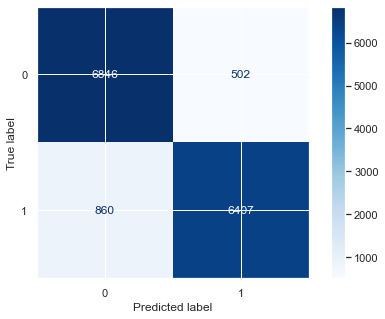

In [106]:
# Checking the tuned result for XG boost

model_tuned_pipeline_xgboost = custom_pipeline(XGBClassifier(**best_param),display=True)

In [107]:
# Named_steps['model']  allows us to see the details of al the parameters, 

model_tuned_pipeline_xgboost[-1].named_steps['model'] 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, model__max_depth=8, model__min_child_weight=1,
              model__subsample=0.8, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [108]:
# Looking at the steps 
model_tuned_pipeline_xgboost

(0.9215347508510238,
 0.9068080738966815,
 0.9273411492256477,
 0.8816568047337278,
 0.9039221218961625,
 array([0, 0, 1, ..., 0, 1, 0]),
 array([0.06556298, 0.46847075, 0.9694718 , ..., 0.04189071, 0.8152466 ,
        0.0643718 ], dtype=float32),
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['age', 'campaign',
                                                    'euribor3m', 'cons_conf_idx',
                                                    'previous', 'pdays', 'count',
                                                    'cons_price_idx']),
                                                  ('cat', OneHotEncoder(),
                                                   ['job', 'marital',
                                                    'education', 'default',
                                                    'housing', 'loan', 'contact',
                                

In [109]:
# Obtaining the propbilies for XG Boost

y_probs_xgboost_t = model_tuned_pipeline_xgboost[-2]
y_probs_xgboost_t

array([0.06556298, 0.46847075, 0.9694718 , ..., 0.04189071, 0.8152466 ,
       0.0643718 ], dtype=float32)

### Random Forest - Hyperparameter Tuning

In [110]:
# Verifying that this is where Random Forest is stored. 
pipe_models[-2] 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'campaign',
                                                   'euribor3m', 'cons_conf_idx',
                                                   'previous', 'pdays', 'count',
                                                   'cons_price_idx']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome',
                                                   'age_group'])])),
                ('model', RandomForestClassifier(n_jobs=-1))])

In [111]:
# Checking the location of the model and its keys 


pipeline_rf = pipe_models[-2] 
pipeline_rf.get_params().keys() # Checking the keys for the parameters 

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__copy', 'preprocessor__num__with_mean', 'preprocessor__num__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__max_categories', 'preprocessor__cat__min_frequency', 'preprocessor__cat__sparse', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 

In [112]:
# The below cells are commented since  it takes a couple of hours to runthough all the parameters.

# param_grid_rf = { 
#    'model__n_estimators': [100, 300, 600, 900, 1200], 
#     'model__max_features': [2, 4,6,8,10,12,14], 
#     'model__max_depth' : [50, 100, 200], 
#     'model__criterion' :['gini', 'entropy'] 
# }

In [113]:
# # GrifSearch
# grid_clf_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='accuracy',
#                         cv=3, n_jobs=-1,verbose=2)

In [114]:
# grid_clf_rf.fit(X_train, y_train)

In [115]:
# best_params_rf = grid_clf_rf.best_params_

In [116]:
# Using the best parameters
best_params_rf = {'model__criterion': 'gini',
 'model__max_depth': 200,
 'model__max_features': 14,
 'model__n_estimators': 900}

In [117]:
# Checking Parameters
best_params_rf

{'model__criterion': 'gini',
 'model__max_depth': 200,
 'model__max_features': 14,
 'model__n_estimators': 900}

In [118]:
# Removing ‘_’ - to match the code out side of the pipeline 
best_params_rf = {k.split('__')[1]:best_params_rf[k] for k in best_params_rf}

In [119]:
# RandomForestClassifier(criterion='gini',max_depth=200, )

# {'model__criterion': 'gini',
#  'model__max_depth': 200,
#  'model__max_features': 14,
#  'model__n_estimators': 900}

In [120]:
# Applying best parameters
clf_rf = RandomForestClassifier(**best_params_rf)

In [121]:
# Checking if worked
clf_rf 

RandomForestClassifier(max_depth=200, max_features=14, n_estimators=900)

Training_Accuracy: 0.9956037564788998
Test_Accuracy: 0.9233664043790626
Precision: 0.9257514891259178
Recall: 0.9196367139122059
F1_Score: 0.9226839707303603



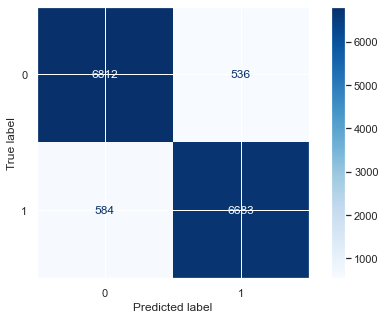

In [122]:
# Model tuned results
model_tuned_pipeline_rf = custom_pipeline(clf_rf,display=True)

******************************************************************************************

### Before and After Hyper Tunning - Receiver Operating Characteristic ("ROC")

In [123]:
# Displaying the results step by step

model_tuned_pipeline_rf

(0.9956037564788998,
 0.9233664043790626,
 0.9257514891259178,
 0.9196367139122059,
 0.9226839707303603,
 array([0, 0, 1, ..., 0, 1, 0], dtype=int64),
 array([0.05777778, 0.25777778, 0.99222222, ..., 0.08361111, 0.71796296,
        0.03444444]),
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['age', 'campaign',
                                                    'euribor3m', 'cons_conf_idx',
                                                    'previous', 'pdays', 'count',
                                                    'cons_price_idx']),
                                                  ('cat', OneHotEncoder(),
                                                   ['job', 'marital',
                                                    'education', 'default',
                                                    'housing', 'loan', 'contact',
                                  

In [124]:
list_models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(n_jobs=-1),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...)]

In [126]:
# Random Forest - Tuned with best parameters
x_probs[2]

array([0.09      , 0.35      , 0.99      , ..., 0.03666667, 0.76333333,
       0.02      ])

In [ ]:
#NEED TO CHANE THE MODLES  ONLY rf_recall_t is correct 

In [ ]:
# Checking x_probs for Randon Forest
x_probs

# ROC PLOT

In [127]:
# Locating Random Forest without tuning 
x_probs[3]

array([0.06556298, 0.46847075, 0.9694718 , ..., 0.04189071, 0.8152466 ,
       0.0643718 ], dtype=float32)

In [128]:
# Locating Random Forest with tuning 
model_tuned_pipeline_rf

(0.9956037564788998,
 0.9233664043790626,
 0.9257514891259178,
 0.9196367139122059,
 0.9226839707303603,
 array([0, 0, 1, ..., 0, 1, 0], dtype=int64),
 array([0.05777778, 0.25777778, 0.99222222, ..., 0.08361111, 0.71796296,
        0.03444444]),
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['age', 'campaign',
                                                    'euribor3m', 'cons_conf_idx',
                                                    'previous', 'pdays', 'count',
                                                    'cons_price_idx']),
                                                  ('cat', OneHotEncoder(),
                                                   ['job', 'marital',
                                                    'education', 'default',
                                                    'housing', 'loan', 'contact',
                                  

In [ ]:
x_probs[-3]

In [ ]:
model_tuned_pipeline_xgboost[6]

In [ ]:
# Generate probablities to plot for Random Forest

rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_test, x_probs[3]) 

rf_precision_t, rf_recall_t, rf_threshold_t = precision_recall_curve(y_test, model_tuned_pipeline_rf[6]) # model2


In [ ]:
# Generate probablities to plot for XgBoost

xg_precision, xg_recall, xg_thresholds = precision_recall_curve(y_test, x_probs[-1]) #Model1

xg_precision_t, xg_recall_t, xg_threshold_t = precision_recall_curve(y_test, model_tuned_pipeline_xgboost[6]) # model2


In [ ]:
print(' ROC Before and After Hyper Tunning  ')

# Subplot for ROC 

fig, axs = plt.subplots(1, 2,figsize=(15, 5))


# Random Forest Before Tuning Plot
axs[0].plot(rf_precision, rf_recall, color='red')
axs[0].set_title('ROC - Random Forest Base Model - Before Turning')
axs[0].set_ylabel('Precision')
axs[0].set_xlabel('Recall')

#Random Forest After Tuning Plot 

axs[0].plot(rf_precision_t, rf_recall_t, 'tab:green')
axs[0].set_title('ROC - Random Forest Model - After Turning')
axs[0].set_ylabel('Precision')
axs[0].set_xlabel('Recall')

#XGBoost Before Tuning Plot 

axs[1].plot(xg_precision, xg_recall, 'tab:red')
axs[1].set_title('ROC - XGBoost Base Model - Before Turning')
axs[1].set_ylabel('Precision')
axs[1].set_xlabel('Recall')

#XGBoost Forest After Tuning Plot 

axs[1].plot(xg_precision_t, xg_recall_t, 'tab:green')
axs[1].set_title('ROC - XGBoost Model - After Turning')
axs[1].set_ylabel('Precision')
axs[1].set_xlabel('Recall')

for ax in axs.flat:
    ax.set(xlabel='Recall', ylabel='Precision')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    

# #add axis labels to plot


# #display plot
# plt.show()

In [ ]:
x_probs[2]

### Feature of Importance

### Feature of Importance for Random Forst

In [ ]:
# Step 5 - predict values
pipe_models[-2] 

In [ ]:
# In order to obtain the column names, including the columns that have been dummies, 
# I would need to go back to X-train and use the get_dummies feature. 
pipeline_col = num_col + list(pd.get_dummies(X_train[cat_col]))
pipeline_col

In [ ]:
#Double check x_train variables 

X_train

In [ ]:
# Locate where model is stored in -2

rf_model = pipe_models[-2].named_steps['model']
rf_model

In [ ]:
# Another way to locate where model is stored in -2

pipe_models[-2].steps[1][1]

In [ ]:
#pipe_models[-2][-2].named_steps['model']

In [ ]:
# Full pipeline overview

pipe_models

In [ ]:
# Random Forest check for prediction
model_tuned_pipeline_rf[5]

In [ ]:
# Store predictions
y_pred_rf = model_tuned_pipeline_rf[5]

In [ ]:
# Store features

f_imp = clf_rf.feature_importances_

In [ ]:
#f_imp = val[-1].steps[1][1].feature_importances_

In [ ]:
# Create a data frame for the important features from the tuned Random Forest model 

f_imp_df = pd.DataFrame({'imp':f_imp,'col':pipeline_col})

In [ ]:
# Sort values

f_imp_df = f_imp_df.sort_values('imp',ascending=False).head(10)

In [ ]:
# Display results for the important features 

f_imp_df

In [ ]:
# Display results for the important features 

f_imp_df['col'].to_list()

In [ ]:
# Plot important features 

plt.figure(figsize=(10,5))

sns.barplot(data=f_imp_df, x="col", y="imp")
  
plt.xlabel("Features", fontsize=22)

plt.ylabel('Importance', fontsize=22)

plt.xticks(rotation = 60,fontsize=20)

plt.yticks(rotation = 0,fontsize=20)

plt.grid(True, color = "white", linewidth = "1.4", linestyle = "-")

plt.show()

In [ ]:
# Look into the classification report 

report = classification_report(y_test, y_pred_rf)

print(report)

### Confusion Matrix

In [ ]:
# Build  a confutation matrix with percentage and storing 
# "True Neg","False Pos","False Neg","True Pos"

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rf).ravel()

In [ ]:
# Display

tn, fp, fn, tp

In [ ]:
# Confusion matrix

cf_matrix = confusion_matrix(y_test,y_pred_rf)
cf_matrix

In [ ]:
# Storing results

tn, fp, fn, tp = cf_matrix.ravel()

In [ ]:
# Customizing the matrix  

# Adding names 
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

# Formatting and adding percentages 
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

# Connecting the names with the numbers 

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

# Apply heat map
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Accent')
plt.show()

#### Let's look closer into how well the model predicted subscribers versus non-subscribers.

 * We predicted correctly 93% of the time that an individual would not subscribe.
 * We predicted correctly 92% of the time that an individual would subscribe. 
 * We predicted incorrectly  7% of the time that an individual would not subscribe.
 * We predicted incorrectly  8% of the time that an individual would subscribe.


#### Conclusions:
    
In this project,we implemented data analysis and predictive classified models to predict term deposit subscriptions at a Portuguese bank institution. With the accuracy of 93% using Random Forest, the following business recommendations are:

* Pay close attention to socioeconomic data:
3 Month Euribor rate - The Euribor rate is based on the average interest rates at which Eurozone banks lend funds to other banks. Ramp up the campaign when rates are high. A prospect is more likely to invest in a term deposit knowing that they will receive a high interest rate.
Consumer Confidence Index - Individuals are more likely to invest if their financial situation is good and if the country’s outlook is optimistic. 

* Target telemarketing calls toward select the individuals who belong to a specific age group and occupation. Seniors, and Students, and Retired Individuals are more likely to subscribe to a term deposit. 

* Conduct the campaign during specific months. March, September, and October have been shown to have a higher rate of subscriptions. 


In [ ]:
def f(x):
    for i in range(x):
        print(i,end=',')

In [ ]:
f(10)